In [51]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from pathlib import Path
from typing import Tuple
from sklearn.manifold import TSNE

In [52]:
def load_usps(usps_file: Path = './datasets/usps.h5') -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    with h5py.File(usps_file, 'r') as usps_open:
        train = usps_open.get('train')
        train_data = train.get('data')[:]
        train_labels = train.get('target')[:]
        test = usps_open.get('test')
        test_data = test.get('data')[:]
        test_labels = test.get('target')[:]
        
    return train_data, train_labels, test_data, test_labels

In [53]:
usps_train_data, usps_train_labels, usps_test_data, usps_test_labels = load_usps()
(mnist_train_data, mnist_train_labels), (mnist_test_data, mnist_test_labels) = mnist.load_data()
print(f'USPS training data shape: {usps_train_data.shape}')
print(f'USPS test data shape: {usps_test_data.shape}')
print(f'MNIST training data shape: {mnist_train_data.shape}')
print(f'MNIST test data shape: {mnist_test_data.shape}')

USPS training data shape: (7291, 256)
USPS test data shape: (2007, 256)
MNIST training data shape: (60000, 28, 28)
MNIST test data shape: (10000, 28, 28)


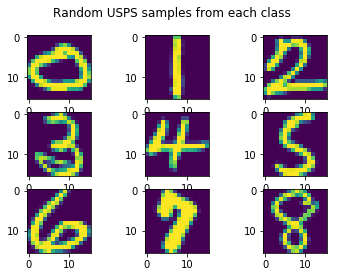

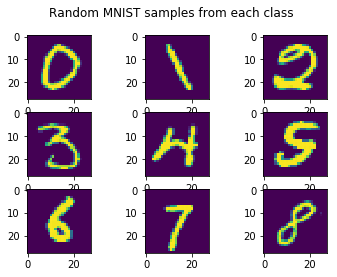

In [54]:
np.random.seed(42)
def plot_sample_grid(train_data: np.ndarray,
                     train_labels: np.ndarray,
                     img_width: int,
                     img_height: int,
                     dataset_name: str,
                     img_grid_width: int = 3,
                     img_grid_height: int = 3) -> None:
    unique_labels = np.unique(train_labels)
    grid_fig = plt.figure()
    for i in range(img_grid_width * img_grid_height):
        label_ix = np.argwhere(unique_labels[i] == train_labels).flatten()
        random_label_ix = np.random.choice(label_ix, 1)
        random_label_img = train_data[random_label_ix, :]
        random_label_img = np.reshape(random_label_img, (img_height, img_width))
        grid_fig.add_subplot(img_grid_height, img_grid_width, i+1)
        plt.imshow(random_label_img)
    grid_fig.suptitle(f'Random {dataset_name} samples from each class')
    plt.show()
    
    
plot_sample_grid(usps_train_data, 
                 usps_train_labels, 
                 img_width=16, 
                 img_height=16, 
                 dataset_name = 'USPS')
plot_sample_grid(mnist_train_data, 
                 mnist_train_labels, 
                 img_width=28, 
                 img_height=28, 
                 dataset_name = 'MNIST')

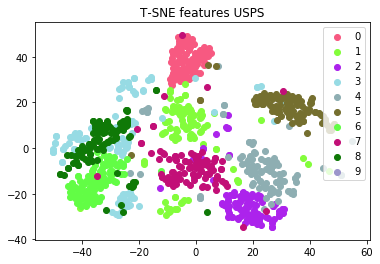

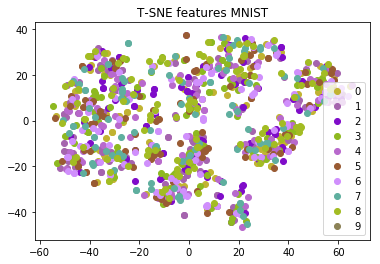

In [71]:
def plot_tsne(data: np.ndarray,
              labels: np.ndarray,
              dataset_name: np.ndarray,
              num_samples_per_class: int = 100) -> None:
    unique_labels = np.unique(labels)
    x_tsne = np.array([])
    for i in range(len(unique_labels)):
        label_ix = np.argwhere(unique_labels[i] == labels).flatten()
        random_labels_ix = np.random.choice(label_ix, num_samples_per_class)
        random_label_data = data[random_labels_ix, :]
        random_label_data = np.reshape(random_label_data, (num_samples_per_class, -1))
        if i == 0:
            x_tsne = random_label_data
        else:
            x_tsne = np.vstack((x_tsne, random_label_data))
    tsne_emb = TSNE(n_components=2).fit_transform(x_tsne)
    for i in range(len(unique_labels)):
        rgb = np.random.rand(3,)
        start_slice = (i+1)*num_samples_per_class
        stop_slice = (i+2)*num_samples_per_class
        x_plot = tsne_emb[()]
        plt.scatter(tsne_emb[start_slice:stop_slice, 0], tsne_emb[start_slice:stop_slice,1], c=[rgb])
    plt.title(f'T-SNE features {dataset_name}')
    plt.legend(unique_labels)
    plt.show()
    
plot_tsne(usps_train_data, 
          usps_train_labels, 
          dataset_name='USPS',
         num_samples_per_class=100)
plot_tsne(mnist_train_data, 
          usps_train_labels, 
          dataset_name='MNIST',
          num_samples_per_class=100)